In [1]:
%matplotlib inline
from equadratures import *
import numpy as np

Let us begin by defining our parameters and basis

In [2]:
x1 = Parameter(distribution='Uniform', order=9, lower=-1., upper=1.)
x2 = Parameter(distribution='Uniform', order=9, lower=-1., upper=1.)
totalorder = Basis('Total order')

Consider the following function and its gradient:
$$f(x_1, x_2) = exp( 2 x_1 + x_2),$$
$$\nabla f=\left(\begin{array}{c}
2 exp( 2 x_1 + x_2) \\
exp( 2 x_1 + x_2) 
\end{array}\right).$$

In [3]:
def fun(x):
    return np.exp(2*x[0] + x[1])

In [4]:
def gradfun(x):
    return [2*np.exp(2*x[0] + x[1]), np.exp(2*x[0] + x[1])]

Now lets set up the calculation without gradients! Sample from the given mesh using an optimization strategy and with some level of oversampling.

In [5]:
OBJECT = Polylsq(parameters=[x1, x2], 
            basis=totalorder, 
            mesh='tensor', 
            optimization='greedy-qr',
            oversampling=1.2, gradients=True)
print OBJECT.quadraturePoints

Iterating...system rank: 3, and the # of rows in Az: 1
Iterating...system rank: 6, and the # of rows in Az: 2
Iterating...system rank: 9, and the # of rows in Az: 3
Iterating...system rank: 12, and the # of rows in Az: 4
Iterating...system rank: 15, and the # of rows in Az: 5
Iterating...system rank: 18, and the # of rows in Az: 6
Iterating...system rank: 21, and the # of rows in Az: 7
Iterating...system rank: 24, and the # of rows in Az: 8
Iterating...system rank: 27, and the # of rows in Az: 9
Iterating...system rank: 30, and the # of rows in Az: 10
Iterating...system rank: 33, and the # of rows in Az: 11
Iterating...system rank: 36, and the # of rows in Az: 12
Iterating...system rank: 38, and the # of rows in Az: 13
Iterating...system rank: 41, and the # of rows in Az: 14
Iterating...system rank: 44, and the # of rows in Az: 15
Iterating...system rank: 47, and the # of rows in Az: 16
Iterating...system rank: 50, and the # of rows in Az: 17
Iterating...system rank: 53, and the # of r

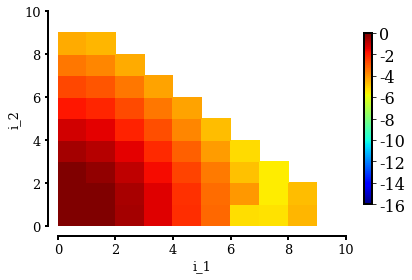

In [6]:
OBJECT.computeCoefficients(fun, gradfun, 'weighted')
coeffplot2D(OBJECT.coefficients, OBJECT.basis.elements, 'i_1', 'i_2')

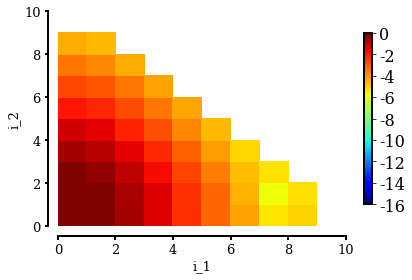

In [7]:
OBJECT.computeCoefficients(fun, gradfun, 'null-space')
coeffplot2D(OBJECT.coefficients, OBJECT.basis.elements, 'i_1', 'i_2')

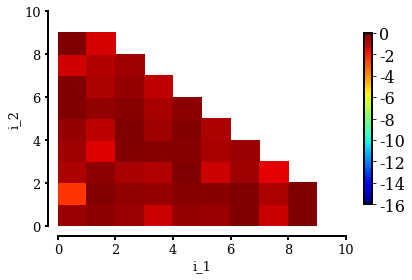

In [8]:
OBJECT.computeCoefficients(fun, gradfun, 'direct-elimination')
coeffplot2D(OBJECT.coefficients, OBJECT.basis.elements, 'i_1', 'i_2')

In [9]:
print OBJECT.basis.elements

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 2.]
 [2. 0.]
 [1. 2.]
 [2. 1.]
 [2. 2.]
 [0. 3.]
 [3. 0.]
 [1. 3.]
 [3. 1.]
 [3. 2.]
 [2. 3.]
 [3. 3.]
 [0. 4.]
 [4. 0.]
 [1. 4.]
 [4. 1.]
 [4. 2.]
 [2. 4.]
 [4. 3.]
 [3. 4.]
 [4. 4.]
 [0. 5.]
 [5. 0.]
 [5. 1.]
 [1. 5.]
 [2. 5.]
 [5. 2.]
 [5. 3.]
 [3. 5.]
 [4. 5.]
 [5. 4.]
 [6. 0.]
 [0. 6.]
 [6. 1.]
 [1. 6.]
 [2. 6.]
 [6. 2.]
 [6. 3.]
 [3. 6.]
 [0. 7.]
 [7. 0.]
 [1. 7.]
 [7. 1.]
 [7. 2.]
 [2. 7.]
 [0. 8.]
 [8. 0.]
 [1. 8.]
 [8. 1.]
 [0. 9.]
 [9. 0.]]
